# Clasificación Binaria de Imágenes usando Redes Neuronales Convolucionales

## Dataset: Aedes Aegypti y Aedes Albopictus

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import random
import shutil
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
Path = "../Práctica 1/" #Depende de la ruta en tu máquina

In [5]:
with zipfile.ZipFile(Path+'DataSetAedes.zip', 'r') as archive:
   # Extract all the contents of zip file in current directory
   archive.extractall(Path)

In [6]:
os.listdir(Path+"DataSetAedes")

['Aegypti', 'Albopictus']

In [7]:
os.listdir(Path+"DataSetAedes/Aegypti")

['Aedes16.jpg',
 'Aedes16_side.jpg',
 'Aedes16_t.JPG',
 'Aedes16_v.JPG',
 'Aedes28.jpg',
 'Aedes28_side.jpg',
 'Aedes28_t.JPG',
 'Aedes28_v.JPG',
 'Aedes3.jpg',
 'Aedes3_side.jpg',
 'Aedes3_t.JPG',
 'Aedes3_v.JPG',
 'aegypti_1.jpg',
 'aegypti_10.JPG',
 'aegypti_10_side.jpg',
 'aegypti_10_t.JPG',
 'aegypti_10_v.JPG',
 'aegypti_11.JPG',
 'aegypti_11_side.jpg',
 'aegypti_11_t.JPG',
 'aegypti_11_v.JPG',
 'aegypti_12.jpg',
 'aegypti_12_side.jpg',
 'aegypti_12_t.JPG',
 'aegypti_12_v.JPG',
 'aegypti_13.jpg',
 'aegypti_13_side.jpg',
 'aegypti_13_t.JPG',
 'aegypti_13_v.JPG',
 'aegypti_14.jpg',
 'aegypti_14_side.jpg',
 'aegypti_14_t.JPG',
 'aegypti_14_v.JPG',
 'aegypti_15.jpg',
 'aegypti_15_side.jpg',
 'aegypti_15_t.JPG',
 'aegypti_15_v.JPG',
 'aegypti_16.JPG',
 'aegypti_16_side.jpg',
 'aegypti_16_t.JPG',
 'aegypti_16_v.JPG',
 'aegypti_17.jpg',
 'aegypti_17_side.jpg',
 'aegypti_17_t.JPG',
 'aegypti_17_v.JPG',
 'aegypti_18.jpg',
 'aegypti_18_side.jpg',
 'aegypti_18_t.JPG',
 'aegypti_18_v.JPG',
 '

In [9]:
import tqdm
import splitfolders
os.makedirs(Path+"data", exist_ok=True)

In [ ]:
splitfolders.ratio(Path+"DataSetAedes", output= Path+"data",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=True)

In [10]:
os.listdir(Path+"data")

['train', 'val']

In [11]:
shutil.rmtree(Path+"DataSetAedes")

In [12]:
os.listdir(Path+"data/train")

['Aegypti', 'Albopictus']

In [13]:
train_Aegypti = Path+"data/train/Aegypti/"
train_Albopictus = Path+"data/train/Albopictus/"

#test_Aegypti = Path+"data/val/Aegypti/"
#test_Albopictus = Path+"data/val/Albopictus/"

In [14]:
train_dir_Aegypti = os.listdir(train_Aegypti)
train_dir_Albopictus = os.listdir(train_Albopictus)

#test_dir_Aegypti = os.listdir(test_Aegypti)
#test_dir_Albopictus = os.listdir(test_Albopictus)

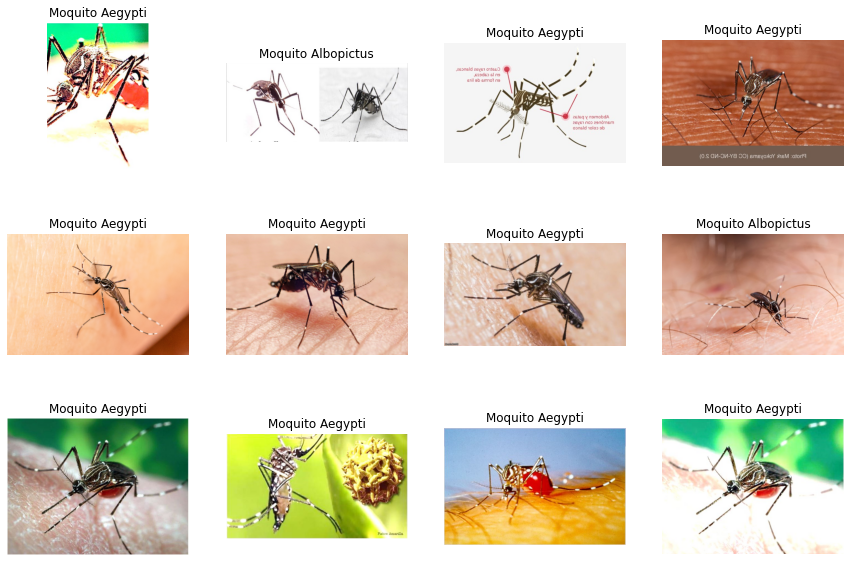

In [15]:
plt.figure(figsize=(15,10))
for i in range(12):
    ran = random.choice(range(0,200))
    rand_Aegypti = [os.path.join(train_Aegypti, f) for f in train_dir_Aegypti[ran:ran+1]]
    rand_Albopictus = [os.path.join(train_Albopictus, g) for g in train_dir_Albopictus[ran:ran+1]]
    rand = random.choice(rand_Aegypti + rand_Albopictus)
    name = rand.split('/')
    name = 'Moquito ' + name[-2] 
    plt.subplot(3, 4, i+1)
    img = plt.imread(rand)
    plt.imshow(img,cmap = 'gray')
    plt.axis(False)
    plt.title(name)
plt.show()

Sample_Image_size(H*W): (295, 394, 3)


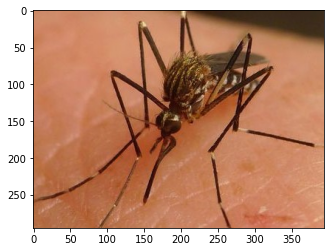

In [16]:
# Looking the size of a random sample image
sample = random.choice(train_dir_Aegypti)
sample = plt.imread(train_Aegypti + sample)
samp = sample.shape
plt.imshow(sample)
print('Sample_Image_size(H*W):', samp)

In [17]:
x, y = [], []
for i in train_dir_Aegypti:
    img_array = plt.imread(train_Aegypti + i)
    shape = img_array.shape
    x.append(shape[0])
    y.append(shape[1])
df_shape = pd.DataFrame({'height': x, 'width': y, 'index': range(0, len(train_dir_Aegypti))})

In [18]:
df_shape.head()

,height,width,index
0,256,256,0
1,256,256,1
2,256,257,2
3,257,257,3
4,256,256,4


In [19]:
# Looking for the average size
df_shape.describe()

,height,width,index
count,208.000000,208.000000,208.000000
mean,428.625000,630.552885,103.500000
std,252.104042,411.087749,60.188592
min,176.000000,237.000000,0.000000
25%,295.750000,421.250000,51.750000
50%,364.000000,590.000000,103.500000
75%,476.250000,677.000000,155.250000
max,2177.000000,3794.000000,207.000000


In [20]:
#Normalizan los valores entre 0 y 1
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [21]:
train

In [22]:
train_dataset = train.flow_from_directory(Path+"data/train/",
                                          target_size=(250,250),
                                          batch_size = 8,
                                          class_mode = 'binary')

Found 416 images belonging to 2 classes.


In [23]:
test_dataset = test.flow_from_directory(Path+"data/val/",
                                          target_size=(250,250),
                                          batch_size = 8,
                                          class_mode = 'binary')

Found 104 images belonging to 2 classes.


In [24]:
test_dataset.class_indices

{'Aegypti': 0, 'Albopictus': 1}

In [25]:
model = tf.keras.models.Sequential([
    # since Conv2D is the first layer of the neural network, we should also specify the size of the input
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
    # apply pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # and repeat the process
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the result to feed it to the dense layer
    tf.keras.layers.Flatten(), 
    # and define 512 neurons for processing the output coming by the previous layers
    tf.keras.layers.Dense(512, activation='relu'), 
    # a single output neuron. The result will be 0 if the image is an Aegypti, 1 if it is an Albopictus
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [27]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [28]:
#steps_per_epoch = train/batch_size

history = model.fit(
            train_dataset, # pass in the training generator
            steps_per_epoch=50,
            epochs=15,
            validation_data=test_dataset, # pass in the validation generator
            validation_steps=13,
            verbose=2
            )

Epoch 1/15
50/50 - 8s - loss: 0.7007 - accuracy: 0.5850 - val_loss: 0.5116 - val_accuracy: 0.6923 - 8s/epoch - 164ms/step
Epoch 2/15
50/50 - 2s - loss: 0.5086 - accuracy: 0.7425 - val_loss: 0.5123 - val_accuracy: 0.7115 - 2s/epoch - 46ms/step
Epoch 3/15
50/50 - 2s - loss: 0.3995 - accuracy: 0.8175 - val_loss: 0.3214 - val_accuracy: 0.8558 - 2s/epoch - 45ms/step
Epoch 4/15
50/50 - 2s - loss: 0.2783 - accuracy: 0.8675 - val_loss: 0.3098 - val_accuracy: 0.8269 - 2s/epoch - 44ms/step
Epoch 5/15
50/50 - 2s - loss: 0.1606 - accuracy: 0.9325 - val_loss: 0.1725 - val_accuracy: 0.9519 - 2s/epoch - 43ms/step
Epoch 6/15
50/50 - 2s - loss: 0.0930 - accuracy: 0.9800 - val_loss: 0.2492 - val_accuracy: 0.8558 - 2s/epoch - 43ms/step
Epoch 7/15
50/50 - 2s - loss: 0.0875 - accuracy: 0.9750 - val_loss: 0.1950 - val_accuracy: 0.9231 - 2s/epoch - 43ms/step
Epoch 8/15
50/50 - 2s - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.1351 - val_accuracy: 0.9519 - 2s/epoch - 43ms/step
Epoch 9/15
50/50 - 2s - loss: 0

Text(0.5, 1.0, 'Loss in training and validation')

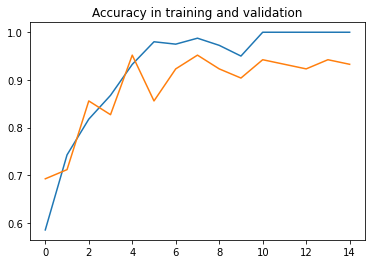

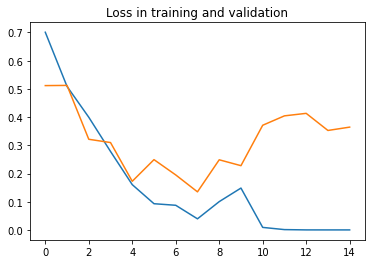

In [29]:
# get the metrics from history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [30]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(250,250))

    plt.imshow(img1)

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:

        plt.xlabel("Albopictus",fontsize=30)


    elif val == 0:

        plt.xlabel("Aegypti",fontsize=30)

1/1 [==============================] - 0s 391ms/step
[[0.]]


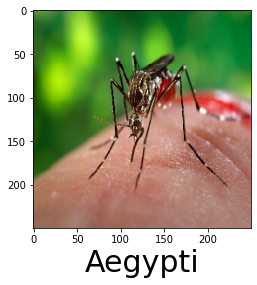

In [32]:
predictImage(Path + "Aegypti3.jpg")